In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import cos, sin, exp, Matrix, sqrt
from sympy.simplify.fu import TR10, TR9
import pandas as pd

from IPython.display import display, Math
from IPython.display import display as disp
from utils import symdisp, symplot
import ipywidgets as widgets
from ipywidgets import interact

from commpy.utilities import upsample

from optic.modulation import modulateGray, demodulateGray, GrayMapping
from optic.dsp import firFilter, pulseShape, lowPassFIR, pnorm, sincInterp
from optic.metrics import signal_power
from optic.plot import eyediagram

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
figsize(10, 3)

# Comunicações Ópticas

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Representações-para-a-portadora-óptica" data-toc-modified-id="Representações-para-a-portadora-óptica-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Representações para a portadora óptica</a></span><ul class="toc-item"><li><span><a href="#Modulações-digitais" data-toc-modified-id="Modulações-digitais-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modulações digitais</a></span></li><li><span><a href="#Diagramas-de-constelação" data-toc-modified-id="Diagramas-de-constelação-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Diagramas de constelação</a></span></li></ul></li><li><span><a href="#Modulador-de-Mach-Zehnder" data-toc-modified-id="Modulador-de-Mach-Zehnder-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modulador de Mach-Zehnder</a></span><ul class="toc-item"><li><span><a href="#Transmitindo-informação-na-intensidade-(potência)-da-portadora-óptica-($V_b-=-\pm-V_π/2$)" data-toc-modified-id="Transmitindo-informação-na-intensidade-(potência)-da-portadora-óptica-($V_b-=-\pm-V_π/2$)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Transmitindo informação na intensidade (potência) da portadora óptica ($V_b = \pm V_π/2$)</a></span></li><li><span><a href="#Transmitindo-informação-na-amplitude-do-campo-elétrico-($V_b-=-\pm-V_π$)" data-toc-modified-id="Transmitindo-informação-na-amplitude-do-campo-elétrico-($V_b-=-\pm-V_π$)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Transmitindo informação na amplitude do campo elétrico ($V_b = \pm V_π$)</a></span></li><li><span><a href="#Razão-de-extinção" data-toc-modified-id="Razão-de-extinção-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Razão de extinção</a></span></li></ul></li><li><span><a href="#Intervalos-de-sinalização" data-toc-modified-id="Intervalos-de-sinalização-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Intervalos de sinalização</a></span><ul class="toc-item"><li><span><a href="#Teorema-da-amostragem" data-toc-modified-id="Teorema-da-amostragem-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Teorema da amostragem</a></span></li><li><span><a href="#Exemplo-1:-função-sinc(t)" data-toc-modified-id="Exemplo-1:-função-sinc(t)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exemplo 1: função sinc(t)</a></span></li><li><span><a href="#Exemplo-2:-chirp-de-frequência-linear" data-toc-modified-id="Exemplo-2:-chirp-de-frequência-linear-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Exemplo 2: chirp de frequência linear</a></span></li></ul></li><li><span><a href="#Chaveamento-por-deslocamento-de-amplitude-(amplitude-shift-keying---ASK-ou-pulse-amplitude-modulation---PAM)" data-toc-modified-id="Chaveamento-por-deslocamento-de-amplitude-(amplitude-shift-keying---ASK-ou-pulse-amplitude-modulation---PAM)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Chaveamento por deslocamento de amplitude (<em>amplitude shift-keying</em> - ASK ou <em>pulse amplitude modulation</em> - PAM)</a></span><ul class="toc-item"><li><span><a href="#Gerando-sinais-binários-OOK" data-toc-modified-id="Gerando-sinais-binários-OOK-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gerando sinais binários OOK</a></span><ul class="toc-item"><li><span><a href="#Pulso-retangular-ideal" data-toc-modified-id="Pulso-retangular-ideal-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Pulso retangular ideal</a></span></li><li><span><a href="#Pulso-NRZ-típico" data-toc-modified-id="Pulso-NRZ-típico-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Pulso NRZ típico</a></span></li><li><span><a href="#Pulso-cosseno-levantado" data-toc-modified-id="Pulso-cosseno-levantado-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Pulso cosseno levantado</a></span></li></ul></li></ul></li><li><span><a href="#Densidade-espectral-de-potência-de-sinais-modulados-digitalmenente" data-toc-modified-id="Densidade-espectral-de-potência-de-sinais-modulados-digitalmenente-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Densidade espectral de potência de sinais modulados digitalmenente</a></span><ul class="toc-item"><li><span><a href="#Valor-médio-e-autocorrelação-de-$V(t)$" data-toc-modified-id="Valor-médio-e-autocorrelação-de-$V(t)$-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Valor médio e autocorrelação de $V(t)$</a></span><ul class="toc-item"><li><span><a href="#Valor-médio" data-toc-modified-id="Valor-médio-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Valor médio</a></span></li><li><span><a href="#Autocorrelação" data-toc-modified-id="Autocorrelação-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Autocorrelação</a></span></li></ul></li><li><span><a href="#Densidade-espectral-de-potência-$\mathcal{S}_{V}(f)$" data-toc-modified-id="Densidade-espectral-de-potência-$\mathcal{S}_{V}(f)$-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Densidade espectral de potência $\mathcal{S}_{V}(f)$</a></span></li><li><span><a href="#Exemplos-de-densidade-espectral-de-potência-de-sinais-modulados" data-toc-modified-id="Exemplos-de-densidade-espectral-de-potência-de-sinais-modulados-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Exemplos de densidade espectral de potência de sinais modulados</a></span></li></ul></li><li><span><a href="#Gerando-sinais-4-PAM" data-toc-modified-id="Gerando-sinais-4-PAM-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Gerando sinais 4-PAM</a></span></li><li><span><a href="#Gerando-sinais-QPSK" data-toc-modified-id="Gerando-sinais-QPSK-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gerando sinais QPSK</a></span></li><li><span><a href="#Formatação--de-pulso-óptica:-pulsos-retorno-ao-zero-(RZ)" data-toc-modified-id="Formatação--de-pulso-óptica:-pulsos-retorno-ao-zero-(RZ)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Formatação  de pulso óptica: pulsos retorno-ao-zero (RZ)</a></span></li><li><span><a href="#Pente-de-frequências-(frequency-comb)" data-toc-modified-id="Pente-de-frequências-(frequency-comb)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Pente de frequências (frequency comb)</a></span></li><li><span><a href="#Referências" data-toc-modified-id="Referências-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Referências</a></span></li></ul></div>

# Geração de sinais ópticos

Num sistema de comunicação digital óptica, a função do transmissor é converter uma dada sequência de bits num trem de pulsos elétricos que, por sua vez, será utilizado na modulação de uma portadora óptica (laser). A modulação de portadoras ópticas é realizada por meio de dispositivos de conversão eletro-óptica.

<img src="./figuras/Tx_OOK.png" width="500">

Diversas técnicas de modulação podem ser implementadas e diversos fatores podem influenciar o projeto de um transmissor óptico. 

## Representações para a portadora óptica

O campo elétrico $\mathbf{E}(t)$ da portadora óptica portadora óptica de onda contínua pode ser representado por

$$\begin{equation} \mathbf{E}(t) = A \cos \left(\omega_c t + \theta\right) \mathbf{e} \end{equation}$$ 

em que $\omega_c = 2\pi f_{c}\label{eq1} $ rad/s é a frequência angular de oscilação, $A$ a amplitude e $\theta$ a fase da onda.

In [4]:
θ, omega_c, A, t = sp.symbols('θ, omega_c, A, t', real=True)

j = sp.I
π = sp.pi

E = A*cos(omega_c*t + θ)

symdisp('E(t) = ', E)

<IPython.core.display.Math object>

$E(t)=\operatorname{Re}\left[A e^{j \theta} \exp \left(j \omega_c t\right)\right]$

In [5]:
E = sp.re(A*exp(j*θ)*exp(j*omega_c*t)).simplify()

symdisp('E(t) = ', E)

<IPython.core.display.Math object>

In [6]:
E = sp.expand_trig(E).cancel()

symdisp('E(t) = ', E)

<IPython.core.display.Math object>

In [7]:
print('Portadora:')
symdisp('E(t) = ', E)

print('Representação fasorial polar:')
symdisp('\hat{E}(t) = ', A*exp(j*θ))

print('Representação fasorial cartesiana:')
A_I = sp.re(A*exp(j*θ))
A_Q = sp.im(A*exp(j*θ))

symdisp('\hat{E}(t) = ', A_I + j*A_Q)

symdisp('A_I = ', A_I)
symdisp('A_Q = ', A_Q)

Portadora:


<IPython.core.display.Math object>

Representação fasorial polar:


<IPython.core.display.Math object>

Representação fasorial cartesiana:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Modulações digitais

Uma modulação digital é uma função $F$ que mapeia bits ou conjuntos de bits a símbolos (fasores) no plano complexo

$$ F: \{0, 1\}^k\rightarrow \{A_m,\theta_m\}_{m=1}^M$$

em que sequências de $k$ bits são mapeadas num conjunto de $M$ símbolos ($M=2^k$).

Ex.1: $\{0, 1\}\rightarrow \{(0, 0), (A, 0)\}$ (modulação OOK) 


Ex.2: $\{0, 1\}\rightarrow \{(A, 0), (A, \pi )\}$ (modulação BPSK)


Ex.3: $\{(0, 0),(0, 1),(1, 0),(1, 1)\}\rightarrow \{(0, 0), (A/3, 0), (2A/3, 0), (A, 0)\}$ (modulação 4-PAM ou 4-ASK)


Ex.4: $\{(0, 0),(0, 1),(1, 0),(1, 1)\}\rightarrow \{(A, \pi/4), (A, 3\pi/4), (A, 5\pi/4), (A, 7\pi/4)\}$ (modulação QPSK)

### Diagramas de constelação

In [8]:
# M: order of the modulation format
# constType: 'qam', 'psk', 'pam' or 'ook'

def genConst(M, constType, plotBits):
    try:
        plt.figure(figsize=(6,6))
        plt.plot([],[])
        plt.grid()
        plt.ylabel('$A_Q$', fontsize=14)
        plt.xlabel('$A_I$', fontsize=14)
        plt.axis('square')

        # plot modulation bit-to-symbol mapping    
        constSymb = GrayMapping(M, constType)             # Gray constellation mapping
        bitMap = demodulateGray(constSymb, M, constType)  # bit mapping
        bitMap = bitMap.reshape(-1, int(np.log2(M)))

        # generate random bits
        bits = bitMap.reshape(1, -1)

        # Map bits to constellation symbols
        symbTx = modulateGray(bits, M, constType)

        # normalize symbols energy to 1
        if constType == 'ook':
            plt.xlim(-1.25*max(symbTx.real),1.25*max(symbTx.real))
            plt.ylim(-1.25*max(symbTx.real),1.25*max(symbTx.real));
            plt.vlines(0, -1.25*max(symbTx.real),1.25*max(symbTx.real))
            plt.hlines(0, -1.25*max(symbTx.real),1.25*max(symbTx.real))
        else:
            plt.xlim(1.25*min(symbTx.real),1.25*max(symbTx.real))
            plt.ylim(1.25*min(symbTx.real),1.25*max(symbTx.real));
            plt.vlines(0, 1.25*min(symbTx.real), 1.25*max(symbTx.real))
            plt.hlines(0, 1.25*min(symbTx.real), 1.25*max(symbTx.real))
        
        if M>64:
            plt.plot(symbTx.real, symbTx.imag,'o', markersize=4);
        else:
            plt.plot(symbTx.real, symbTx.imag,'o', markersize=10);                
      
        plt.title('Constelação '+str(M)+'-'+constType.upper());
        
        if plotBits:
            if M>=64:
                fontSize = 6
            else:
                fontSize = 12

            for ind, symb in enumerate(constSymb):
                bitMap[ind,:]
                plt.annotate(str(bitMap[ind,:])[1:-1:2], xy = (symb.real-0.05, symb.imag+0.15), size=fontSize)
        
    except:
        return    
    
interact(genConst, M=[2, 4, 8, 16, 64, 256, 1024], constType=['ook','pam','psk','qam'], plotBits=[True, False]);

interactive(children=(Dropdown(description='M', options=(2, 4, 8, 16, 64, 256, 1024), value=2), Dropdown(descr…

## Modulador de Mach-Zehnder


<img src="./figuras/MZM.png" width="600">


$$\begin{equation}
\left[\begin{array}{l}
\hat{E}_{1} \\
\hat{E}_{2}
\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{ll}
1 & j \\
j & 1
\end{array}\right]\left[\begin{array}{cc}
e^{j \phi_{1}} & 0 \\
0 & e^{j \phi_{2}}
\end{array}\right]\frac{1}{\sqrt{2}}\left[\begin{array}{ll}
1 & j \\
j & 1
\end{array}\right]\left[\begin{array}{c}
\hat{E}_{i} \\
0
\end{array}\right]
\end{equation}$$

In [9]:
print('Portadora:')
symdisp('E(t) = ', E)

print('Simplificação: θ = 0')

E_ = E.subs({θ:0})
symdisp('E(t) = ', E)
symdisp('\hat{E}(t) = ', A)

Portadora:


<IPython.core.display.Math object>

Simplificação: θ = 0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
ϕ1, ϕ2, ϕ = sp.symbols('ϕ1, ϕ2, ϕ', real=True)
Ai        = sp.symbols('A_i', real=True)

In [11]:
C  = 1/sqrt(2)*Matrix([[1, j],[j, 1]])

symdisp('C = ', C)

<IPython.core.display.Math object>

In [12]:
M = Matrix([[exp(j*ϕ1), 0],[0, exp(j*ϕ2)]])

symdisp('M = ', M)

<IPython.core.display.Math object>

In [13]:
T = C*M*C

symdisp('T = ', T)

<IPython.core.display.Math object>

In [14]:
Ei = Matrix([[Ai],[0]])

symdisp('\hat{E}_i = ', Ei)

<IPython.core.display.Math object>

In [15]:
Eo = T*Ei
symdisp('\hat{E}_o = ', Eo)

<IPython.core.display.Math object>

In [16]:
Eo[0].subs({ϕ1:ϕ, ϕ2:-ϕ}).simplify()

I*A_i*sin(ϕ)

$$\begin{equation}
\frac{\hat{E}_{\text {out }}(t)}{\hat{E}_{\text {in }}(t)}=\frac{1}{2} \left(e^{j \varphi(t)}+e^{-j \varphi(t)}\right)e^{j\frac{\pi}{2}}
\end{equation}$$

$$
\varphi(t)=\frac{1}{2V_{\pi}}[u(t)+V_b]\pi
$$

$$\begin{equation}
A_{\text {out}}(t) = A_{i n}(t) \cos \left(\frac{1}{2V_{\pi}}[u(t)+V_b]\pi\right)
\end{equation}$$

In [17]:
from optic.models import mzm

help(mzm)

Help on function mzm in module optic.models:

mzm(Ai, u, Vπ, Vb)
    Optical Mach-Zehnder Modulator (MZM).
    
    Parameters
    ----------
    Ai : scalar or np.array
        Amplitude of the optical field at the input of the MZM.
    u : np.array
        Electrical driving signal.
    Vπ : scalar
        MZM's Vπ voltage.
    Vb : scalar
        MZM's bias voltage.
    
    Returns
    -------
    Ao : np.array
        Modulated optical field at the output of the MZM.



### Transmitindo informação na intensidade (potência) da portadora óptica ($V_b = \pm V_π/2$)

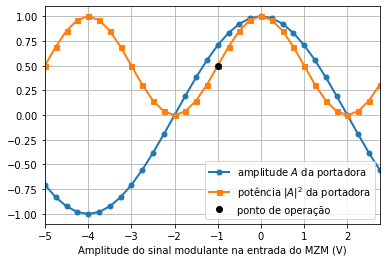

In [35]:
Vπ = 2
Vb = -Vπ/2

u = np.arange(-2*Vπ, 2*Vπ, 0.25) # gera valores entre -2Vπ e 2Vπ

Ai = 1
Ao = mzm(Ai, u, Vπ, Vb)


plt.figure(figsize=(6,4))
plt.plot(u+Vb, Ao,'-o', markersize = 5, label = 'amplitude $A$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u+Vb), max(u+Vb));

plt.plot(u+Vb, np.abs(Ao)**2, '-s', markersize = 5, label = 'potência $|A|^2$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u+Vb), max(u+Vb));

# plota ponto de operação
Aop = mzm(Ai, 0, Vπ, Vb)
plt.plot(Vb, np.abs(Aop)**2,'ko', markersize = 6, label = 'ponto de operação', linewidth = 2);
plt.legend()
plt.grid()

### Transmitindo informação na amplitude do campo elétrico ($V_b = \pm V_π$)

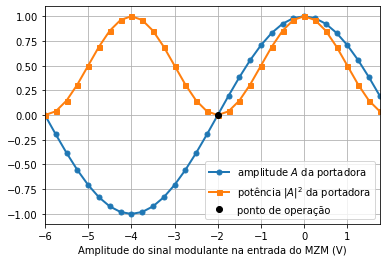

In [34]:
Vπ = 2
Vb = -Vπ

u  = np.arange(-2*Vπ, 2*Vπ, 0.25) # gera valores entre -2Vπ e 2Vπ

Ai = 1
Ao = mzm(Ai, u, Vπ, Vb)

plt.figure(figsize=(6,4))
plt.plot(u+Vb, Ao,'-o', markersize = 5, label = 'amplitude $A$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u+Vb), max(u+Vb));

plt.plot(u+Vb, np.abs(Ao)**2, '-s', markersize = 5, label = 'potência $|A|^2$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u+Vb), max(u+Vb));

# plota ponto de operação
Aop = mzm(Ai, 0, Vπ, Vb)
plt.plot(Vb, Aop,'ko', markersize = 6, label = 'ponto de operação', linewidth = 2);
plt.legend()
plt.grid()

### Razão de extinção

$$ER_{dB} = 10\log_{10}\frac{P_1}{P_0} $$

Razão de extinção (extinction ratio - ER)
ER = 30.45 dB


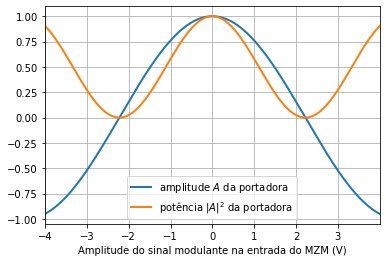

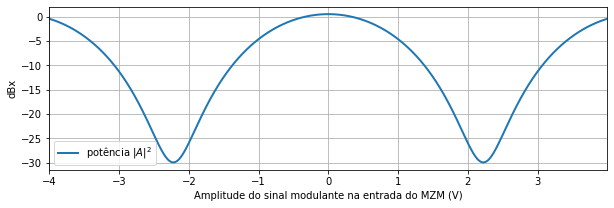

In [36]:
# parâmetros do MZM
Vπ = 2
Vb = 0
u  = np.arange(-2*Vπ, 2*Vπ, 0.00013) # gera valores entre -2Vπ e 2Vπ

Ai = 1
Ao = mzm(Ai, 0.9*u, Vπ, Vb) # gera a curva de resposta o MZM

plt.figure(figsize=(6,4))
plt.plot(u, Ao,'-', markersize = 5, label = 'amplitude $A$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u), max(u));

plt.plot(u, np.abs(Ao)**2, '-', markersize = 5, label = 'potência $|A|^2$ da portadora', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.xlim(min(u), max(u));
plt.legend()
plt.grid()

P  = 10*np.log((np.abs(Ao)**2 + 0.05))

plt.figure()
plt.plot(u, P, label = 'potência $|A|^2$', linewidth = 2);
plt.xlabel('Amplitude do sinal modulante na entrada do MZM (V)')
plt.ylabel('dBx')
plt.xlim(min(u), max(u));
plt.legend()
plt.grid()

print('Razão de extinção (extinction ratio - ER)')

print('ER = %.2f dB'%(max(P)-min(P)))

## Intervalos de sinalização

Transmissores digitais fazem uso do canal de comunicação para transmitir informação de acordo com uma base de tempo, geralmente denomidade de **intervalo de sinalização** ($T_s$). O intervalo de sinalização é o intervalo de tempo no qual o transmissor envia um símbolo discreto mapeado num pulso contínuo. O inverso do intervalo de sinalização é denominado de taxa de transmissão de símbolos ($R_s$), i.e. $R_s=1/T_s$.

A quantidade de bits enviada em cada intervalo de sinalização multiplicada por $R_s$ corresponde à taxa de transmissão de bits do sistema ($R_b$). Assumindo que cada símbolo de uma modulação digital representa uma sequência de $k$ bits, temos que:

$$R_b = kR_s $$

In [ ]:
Rs  = 10e9  # Taxa de símbolos [baud]
Ts  = 1/Rs  # Período de símbolo em segundos
N   = 10    # número de intervalos de sinalização

t = np.arange(0, N+1)*(Ts/1e-12) # tempo em picosegundos (ps)

plt.vlines(t, 0, 1, linestyles='dashed', color = 'k')    
plt.xlabel('tempo [ps]');
plt.title('intervalos de sinalização');
plt.grid()
plt.xticks(t);
plt.xlim(0, t.max());

### Teorema da amostragem

O teorema de amostragem de *Nyquist-Shannon* é um dos resultados mais importantes utilizados em processamento digital de sinais, servindo como uma ponte fundamental entre sinais de tempo contínuo e sinais de tempo discreto. O teorema estabelece uma **condição suficiente** para uma taxa de amostragem que permite que uma sequência discreta de amostras capture toda a informação de um sinal contínuo no tempo e de largura de banda finita.

Considerre $x(t)$ um sinal limitado em banda, i.e. o espectro de frequências de $X(f)=\mathcal{F}\{x(t)\}$ está contido no intervalo $-B\leq f \leq B$, ou seja 

$$ X(f) = \int_{-\infty}^{\infty} x(t)e^{j2\pi f t} dt = 0 \text{, se } f < -B \text{ ou } f > B$$

Suponha que obtenhamos um sinal discreto no tempo $x[k]$ a partir de um conjunto de amostras equiespaçadas de $x(t)$, ou seja $x[k]=x(kT_a)$, em que $T_a = \frac{1}{f_a}$ é o período de amostragem e $f_a$ a frequência de amostragem.

Se $f_a\geq 2B$, $x(t)$ pode ser perfeitamente reconstruído a partir de suas amostras $x[k]$ fazendo

$$
x(t)=\sum_{n=-\infty}^{\infty} x(k T_a) \operatorname{sinc}\left(\frac{t-kT_a}{T_a}\right).
$$


In [ ]:
from optic.metrics import signal_power
from optic.dsp import firFilter, pulseShape, sincInterp
from optic.plot import eyediagram
from commpy.utilities import upsample

### Exemplo 1: função sinc(t)

In [ ]:
Fa = 400   # frequência de amostragem
B  = 100   # banda da sinc
Ta = 1/Fa  # período de amostragem

t = np.arange(0, 0.2, Ta/16) # duração do sinal [s]
d = t.size/2
x = np.sinc(2*B*(t-d*(Ta/16)))

# sinal amostrado com frequência de amostragem fa
xa = x[::16]
ta = t[::16]

plt.figure()
plt.plot(t, x,'-', label = 'x(t)')
plt.plot(ta, xa,'ko', label = '$x[kT_a]$')
plt.grid()
plt.legend()
plt.xlim(min(t), max(t))

# plota psd
x_psd = np.sinc(2*B*((np.arange(0, 2000)*Ta)-1000*Ta))
plt.figure();
plt.psd(x_psd, Fs=Fa, NFFT = 16*1024, sides='twosided')
plt.xlim(-Fa/2, Fa/2);

In [ ]:
x_interp, t_interp = sincInterp(xa, Fa);

plt.figure()
plt.plot(t_interp, x_interp,'--k',label ='$\hat{x}(t) =\sum_{k}\;x_{k}\;sinc[(t-kT_a)/T_a]$');
plt.plot(t, x,'-',label = 'função x(t) original')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

### Exemplo 2: chirp de frequência linear

In [ ]:
from scipy.signal import chirp

Fa = 200   # frequência de amostragem
Ta = 1/Fa  # período de amostragem
B  = 100

d = 1600
t = np.arange(0, 0.5, Ta/16) # duração do sinal [s]

x = chirp(t, f0=-100, f1=100, t1=max(t), method='linear')

# sinal amostrado com frequência de amostragem fa
xa = x[::16]
ta = t[::16]

plt.figure()
plt.plot(t, x,'-', label = 'y(t)')
plt.plot(ta, xa,'ko', markersize = 4, label = '$x[kT_a]$')
plt.xlabel('tempo (s)')
plt.grid()
plt.legend()
plt.xlim(min(t), max(t))

# plota psd
plt.figure();
plt.psd(xa, Fs=Fa, NFFT = 16*1024, sides='twosided')
plt.xlim(-Fa/2, Fa/2);

In [ ]:
x_interp, t_interp = sincInterp(xa, Fa);

plt.figure()
plt.plot(t_interp, x_interp,'--k',label ='$\hat{x}(t) =\sum_{k}\;x_{k}\;sinc[(t-kT_a)/T_a]$');
plt.plot(t, x,'-',label = 'função x(t) original')
plt.xlabel('tempo (s)')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend(loc='upper right');

## Chaveamento por deslocamento de amplitude (*amplitude shift-keying* - ASK ou *pulse amplitude modulation* - PAM)

$ E(t)=\operatorname{Re}\left[A(t) e^{j \theta} \exp \left(j \omega_c t\right)\right]$

$$ \begin{align} A(t) &= \left[ \sum_{n} s_{n} \delta \left(t-n T_{s}\right)\right] \ast p(t) \nonumber \\ & = \sum_{n} s_{n} p\left(t-n T_{s}\right)\end{align}$$

In [ ]:
# parâmetros da simulação
Rs     = 10e9          # Taxa de símbolos (para o caso do OOK Rs = Rb)
Ts     = 1/Rs          # Período de símbolo em segundos

In [ ]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=20)    
n      = np.arange(0, bits.size)

# mapeia bits para símbolos binários
symbTx = 2*bits-1

plt.figure(1)
plt.stem(bits, basefmt=" ", use_line_collection=True)
plt.xlabel('n')
plt.ylabel('$b_n$')
plt.grid()
plt.xticks(np.arange(0, bits.size));

plt.figure(2)
plt.stem(symbTx, basefmt=" ", use_line_collection=True)
plt.xlabel('n')
plt.ylabel('$s_n$')
plt.grid()
plt.xticks(np.arange(0, symbTx.size));

### Gerando sinais binários OOK

#### Pulso retangular ideal

In [ ]:
from sympy import fourier_transform as FT
from sympy import inverse_fourier_transform as iFT
from sympy import oo as infty

def rect(t, a):
    return (sp.Heaviside(t + a) - sp.Heaviside(t - a))

t, f = sp.symbols('t, f', real=True)
Ts = sp.symbols('T_s', real=True, positive=True)

# pulso retangular
p = rect(t, Ts/2)
P = FT(p, t, f)

symdisp('p(t) = ', p)
symdisp('P(f) = ', P)

intervalo_f = np.arange(-4, 4, 0.001)*(Rs/1e9)
intervalo_t = np.arange(-1, 1, 0.001)*(1/(Rs/1e12))

symplot(t, p.subs({Ts:1/(Rs/1e12)}), intervalo_t, funLabel='p(t)', xlabel=' tempo [ps]');
plt.title('Domínio do tempo')
symplot(f, P.subs({Ts:1/(Rs/1e9)}), intervalo_f, funLabel='$|P(f)|$', xlabel= 'frequência [GHz]');
plt.title('Domínio da frequência')
symplot(f, 10*sp.log(sp.Abs(P.subs({Ts:1/(Rs/1e9)})), 10), intervalo_f, funLabel='$|P(f)|$', 
        xlabel= 'frequência [GHz]', ylabel= 'valor absoluto [dB]');
plt.title('Domínio da frequência em dB')
plt.ylim(-50, 0);

In [ ]:
# parâmetros da simulação
SpS = 128           # Amostras por símbolo
Rs  = 10e9          # Taxa de símbolos (para o caso do OOK Rs = Rb)
Ts  = 1/Rs          # Período de símbolo em segundos
Fa  = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta  = 1/Fa          # Período de amostragem

# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso retangular ideal
pulse = pulseShape('rect', SpS)
pulse = pulse/max(abs(pulse))

t = (0.5+np.arange(0, pulse.size))*(Ta/1e-12) # tempo em ps

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

In [ ]:
# formatação de pulso retangular
sigTx  = firFilter(pulse, symbolsUp)
sigTx  = sigTx.real

# plota sinal 
t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-', linewidth=3)
plt.plot(t, symbolsUp.real, 'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulação óptica
P0 = 100e-3 # potência da portadora CW na entrada no MZM
Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, sigTx, Vπ, Vb)

# plota sinal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;\;b_{n}p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.xlim(0, max(t));

#### Pulso NRZ típico

In [ ]:
# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

t = np.arange(0, pulse.size)*(Ta/1e-12)

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

In [ ]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# formatação de pulso retangular
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-',linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, bits.size*Ts, Ts))/1e-12
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulação óptica
P0 = 100e-3 # potência da portadora CW na entrada no MZM
Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, Vπ, sigTx, Vb)

# plota sinal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;\;b_{n}p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.xlim(0, max(t));

#### Pulso cosseno levantado

$$\large
p(t)=\left\{\begin{array}{ll}
\frac{\pi}{4 T} \operatorname{sinc}\left(\frac{1}{2 \beta}\right), & t=\pm \frac{T}{2 \beta} \\
\frac{1}{T} \operatorname{sinc}\left(\frac{t}{T}\right) \frac{\cos \left(\frac{\pi \beta t}{T}\right)}{1-\left(\frac{2 \beta t}{T}\right)^{2}}, & \text { caso contrário }
\end{array}\right.
$$

$$\large
P(f)=\left\{\begin{array}{ll}
1, & |f| \leq \frac{1-\beta}{2 T} \\
\frac{1}{2}\left[1+\cos \left(\frac{\pi T}{\beta}\left[|f|-\frac{1-\beta}{2 T}\right]\right)\right], & \frac{1-\beta}{2 T}<|f| \leq \frac{1+\beta}{2 T} \\
0, & \text { caso contrário }
\end{array}\right.
$$

In [ ]:
# pulso cosseno levantado (raised cosine)
Ncoeffs = 640
rolloff = 0.01

pulse = pulseShape('rc', SpS, Ncoeffs, rolloff, Ts)
pulse = pulse/max(abs(pulse))

t = np.arange(0, pulse.size)*(Ta/1e-12)

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend()

t = (-0.0*Ts + np.arange(0, (Ncoeffs/SpS)*Ts, Ts))/1e-12
plt.vlines(t + 0.5*(Ts/1e-12), -0.2, 1, linestyles='dashed', color = 'k');

In [ ]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# formatação de pulso 
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan


plt.figure(2)
plt.plot(t, sigTx,'-', linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, bits.size*Ts, Ts))/1e-12
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulação óptica
P0 = 100e-3 # potência da portadora CW na entrada no MZM
Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, Vπ, sigTx, Vb)

# plota sinal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;\;b_{n}p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, bits.size))*(Ts/1e-12)
plt.xlim(0, max(t));

## Densidade espectral de potência de sinais modulados digitalmenente

Considere $v(t)$ seja um sinal modulado em banda base no domínio do tempo associado a uma sequência de símbolos $\{s_n\}$ de um dado formato de modulação, ou seja

$$ \begin{equation}
v(t)=\sum_{n=-\infty}^{\infty} s_{n} p(t-n T).
\end{equation}
$$

em que $p(t)$ é o formato do pulso utilizado. O sinal $v(t)$ pode ser entendido como uma realização do processo estocástico $V(t)$ que, por sua vez, depende da sequência aleatória de símbolos $\{s_n\}$. Para cada realização distinta de $\{s_n\}$ temos uma forma de onda $v(t)$ associada.

### Valor médio e autocorrelação de $V(t)$


#### Valor médio

$$
\begin{equation}
\begin{aligned}
E[V(t)] &=\sum_{n=-\infty}^{\infty} E\left[s_{n}\right] p(t-n T) \\
&=m_{s} \sum_{n=-\infty}^{\infty} p(t-n T)
\end{aligned}
\end{equation}
$$

Perceba que $E[V(t)]$ é periódico em $t$ com período $T$, que corresponde ao intervalo de sinalização.

#### Autocorrelação

$$
\begin{equation}
R_{V}(t+\tau, t)=E\left[V^{*}(t) V(t+\tau)\right]=\sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} E\left[s_{n}^{*} s_{m}\right] p(t-nT) p(t+\tau-mT)
\end{equation}
$$

Considerando que $\{s_n\}$ seja uma sequência de símbolos de informação estacionária no sentido amplo, sua autocorrelação $R_{s}$ é definida como

$$
\begin{equation}
\begin{aligned}
R_{s}(n,n+m)&=E\left[s_{n}^{*}s_{n+m}\right]\nonumber\\
        &=R_{s}((n+m)-n)\nonumber\\
        &=R_{s}(m)
\end{aligned}
\end{equation}
$$

Logo,
$$
\begin{equation}
R_{V}(t+\tau, t) =\sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} R_{s}(m-n) p(t-nT) p(t+\tau-mT).
\end{equation}
$$

Podemos reescrever os somatórios de uma maneira mais conveniente fazendo a mudança de variáveis $m'= m-n$, de forma que

$$
\begin{equation}
\begin{aligned}
R_{V}(t+\tau, t) &=\sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} R_{s}(m-n) p(t-nT) p(t+\tau-mT)\nonumber\\
                 &=\sum_{n=-\infty}^{\infty} \sum_{m'=-\infty}^{\infty} R_{s}(m') p(t-nT) p(t+\tau-(m'+n)T)\nonumber\\
                 &=\sum_{m'=-\infty}^{\infty} R_{s}(m') \sum_{n=-\infty}^{\infty} p(t-nT) p(t+\tau -nT -m'T)
\end{aligned}
\end{equation}
$$

ou seja, apenas renomeando o índice do somatório, temos

$$
\begin{equation}
R_{V}(t+\tau, t) =\sum_{m=-\infty}^{\infty} R_{s}(m) \sum_{n=-\infty}^{\infty} p(t-nT) p(t+\tau -nT -mT)
\end{equation}
$$

Perceba que também a autocorrelação $R_{V}(t+\tau, t)$ é periódica em $t$ com período $T$, o que caracteriza $V(t)$ como um *processo cicloestacionário*. Desse modo, podemos caracterizar $V(t)$ pela sua função de autocorrelação média $\bar{R}_{V}(t+\tau, t)$ definida por

$$
\begin{equation}
\begin{aligned}
\bar{R}_{V}(\tau) &=\frac{1}{T} \int_{-T / 2}^{T / 2} R_{V}(t+\tau, t) d t \\
&=\sum_{m=-\infty}^{\infty} R_{s}(m) \sum_{n=-\infty}^{\infty} \frac{1}{T} \int_{-T / 2}^{T / 2} p(t-n T) p(t+\tau-n T-m T) d t \\
&=\sum_{m=-\infty}^{\infty} R_{s}(m) \sum_{n=-\infty}^{\infty} \frac{1}{T} \int_{n T-T / 2}^{n T+T / 2} p(t) p(t+\tau-m T) d t \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) \int_{-\infty}^{\infty} p(t) p(t+\tau-m T) d t.
\end{aligned}
\end{equation}
$$

A integral $\int_{-\infty}^{\infty} p(t) p(t+\tau-m T) dt$ é interpretada como a autocorrelação temporal $R_{p}(\tau)$ do pulso $p(t)$, ou seja

$$
\begin{equation}
R_{p}(\tau)=\int_{-\infty}^{\infty} p(t) p(t+\tau) dt.
\end{equation}
$$

Assim, temos

$$
\begin{equation}
\bar{R}_{V}(\tau)=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) R_{p}(\tau-m T).
\end{equation}
$$

### Densidade espectral de potência $\mathcal{S}_{V}(f)$

Uma vez estabelecida $\bar{R}_{V}(\tau)$, podemos utilizar o teorema de Wiener-Khinchin [2] para determinar a densidade espectral de potência $\mathcal{S}_{V}(f)$ associada a $V(t)$. O teorema estabelece que $\mathcal{S}_{V}(f)$ e $\bar{R}_{V}(\tau)$ são relacionadas por meio da transformada de Fourier, ou seja

$$
\begin{equation}
\begin{aligned}
\mathcal{S}_{V}(f) &=\int_{-\infty}^{\infty} \bar{R}_{V}(\tau) e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) \int_{-\infty}^{\infty} R_{p}(\tau-m T) e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) e^{j 2 \pi f m T}\int_{-\infty}^{\infty} R_{p}(\tau) e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) e^{-j 2 \pi f m T}\int_{-\infty}^{\infty} \left[\int_{-\infty}^{\infty} p(t) p(t+\tau) d t\right] e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) e^{-j 2 \pi f m T}\int_{-\infty}^{\infty}p(t) e^{j 2 \pi f t}dt\int_{-\infty}^{\infty}p(\tau)e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \mathcal{S}_{s}(f)P^*(f)P(f) \\
&=\frac{1}{T} \mathcal{S}_{s}(f)\left|P(f)\right|^{2}.
\end{aligned}
\end{equation}
$$

Portanto,

$$
\begin{equation}
\mathcal{S}_{V}(f) = \frac{1}{T} \mathcal{S}_{s}(f)\left|P(f)\right|^{2},
\end{equation}
$$

em que $\mathcal{S}_{s}(f)$ é dada por
$$
\begin{equation}
\mathcal{S}_{s}(f)=\sum_{m=-\infty}^{\infty} R_{s}(m) e^{-j 2 \pi f m T}.
\end{equation}
$$

Em resumo, a densidade espectral de potência de $\mathcal{S}_{V}(f)$ depende de dois parâmetros: 

1. Do espectro de potência associado à transformada de Fourier $P(f)$ do pulso $p(t)$.
2. Das caraterísticas espectrais $\mathcal{S}_{s}(f)$ da sequência de símbolos de informação $\{s_n\}$.

No caso particular, que engloba a maioria das situações práticas, os símbolos em $\{s_n\}$ são mutuamente descorrelacionados, de forma que

$$
\begin{equation}
R_{s}(m) = \begin{cases}\sigma_{s}^{2}+m_{s}^{2}, & m=0 \\ m_{s}^{2}, & m \neq 0\end{cases}
\end{equation}
$$

em que $\sigma_{s}^{2}+m_{s}^{2}=E[s^2]$ é a energia média dos símbolos da constelação.

ou seja,

$$
\begin{equation}
\mathcal{S}_{s}(f)=\sigma_{s}^{2}+m_{s}^{2} \sum_{m=-\infty}^{\infty} e^{-j 2 \pi f m T}
\end{equation}
$$

Utilizando a relação entre um trem trem de impulsos no domínio da frequência e sua representação em termos da série de Fourier, temos que

$$
\begin{equation}
\sum_{n=-\infty}^{\infty} e^{-j 2 \pi f mT}=\frac{1}{T} \sum_{m=-\infty}^{\infty} \delta\left(f-\frac{m}{T}\right).
\end{equation}
$$

Assim, podemos reescrever

$$
\begin{equation}
\mathcal{S}_{s}(f)=\sigma_{s}^{2}+\frac{m_{s}^{2}}{T} \sum_{m=-\infty}^{\infty} \delta\left(f-\frac{m}{T}\right).
\end{equation}
$$

Finalmente, $\mathcal{S}_{V}(f)$ será dada por

$$
\begin{equation}
\mathcal{S}_{V}(f)=\frac{\sigma_{s}^{2}}{T}\left|P(f)\right|^{2}+\frac{m_{s}^{2}}{T^{2}} \sum_{m=-\infty}^{\infty}\left|P\left(\frac{m}{T}\right)\right|^{2} \delta\left(f-\frac{m}{T}\right).
\end{equation}
$$

De maneira geral, as constelações dos formatos de modulação ASK, PSK, QAM são definidas de tal forma que $m_{s}=0$, bastando apenas que os símbolos sejam posicionados de forma simétrica no plano complexo. Nesse caso, temos

$$
\begin{equation}
\mathcal{S}_{V}(f)=\frac{\sigma_{s}^{2}}{T}\left|P(f)\right|^{2}
\end{equation}
$$

ou seja, o formato de $\mathcal{S}_{V}(f)$ depende apenas do tipo de pulso $p(t)$ escolhido.

Para mais detalhes, ver capítulo 8 de [2].

### Exemplos de densidade espectral de potência de sinais modulados

In [ ]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=10000)    
n      = np.arange(0, bits.size)

# mapeia bits para pulsos elétricos
symbTx = 2*bits-1
symbTx = symbTx/np.sqrt(signal_power(symbTx))

# upsampling
symbolsUp = upsample(symbTx, SpS)

# # pulso cosseno levantado (raised cosine)
# Ncoeffs = 640
# rolloff = 0.1

# pulse = pulseShape('rc', SpS, Ncoeffs, rolloff, Ts)
# pulse = pulse/max(abs(pulse))

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)

# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal elétrico')
plt.legend(loc='upper left');

In [ ]:
P0 = 100e-3 # potência da portadora CW na entrada no MZM

Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)

sigTxo = mzm(Ai, Vπ, 0.25*sigTx, Vb)

# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(np.abs(sigTxo)**2,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico [OOK]')
plt.legend(loc='upper left');

In [ ]:
Nsamples = 10000

# diagrama de olho
eyediagram(sigTx, Nsamples, SpS)
eyediagram(np.abs(sigTxo)**2, Nsamples, SpS)

## Gerando sinais 4-PAM

In [ ]:
plt.figure(figsize=(4,4))
plt.plot([],[])
plt.vlines(0,-1.5,1.5)
plt.hlines(0,-1.5,1.5)
plt.grid()
plt.ylabel('$A_Q$', fontsize=14)
plt.xlabel('$A_I$', fontsize=14)
plt.axis('square')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5);

PAM4 = np.array([[-1,0],[-1/3,0],[1/3,0],[1,0]])
plt.plot(PAM4[:,0], PAM4[:,1],'o', markersize=10,);
plt.title('Constelação 4-PAM bipolar');

In [ ]:
# gera sequência de bits pseudo-aleatórios
bits_a   = np.random.randint(2, size=20)
bits_b   = np.random.randint(2, size=20)

# mapeia bits para símbolos PAM4
symbTx = 2/3*(2*bits_a-1) + 1/3*(2*bits_b-1)

plt.stem(symbTx, basefmt=" ", use_line_collection=True, label ='símbolos 4-PAM')
plt.xlabel('n')
plt.ylabel('$s_n$')
plt.grid()
plt.legend(loc='upper right')
plt.xticks(np.arange(0, symbTx.size));

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:,d}'.format
df = pd.DataFrame({'bits a': bits_a, 'bits b': bits_b})

display(df.T)

In [ ]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(0, sigTx.size)*(Ta/1e-12)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(symbTx, SpS)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-',linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ps]')
plt.ylabel('amplitude [V]')
plt.title('$\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, symbTx.size*Ts, Ts))/1e-12
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

# modulação óptica
P0 = 100e-3 # potência da portadora CW na entrada no MZM
Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, Vπ, sigTx, Vb)

# plota sinal 
t = np.arange(0, sigTxo.size)*(Ta/1e-12)

plt.figure(3)
plt.plot(t, np.abs(sigTxo)**2,'-', linewidth=3)
plt.xlabel('tempo [ps]')
plt.ylabel('potência [W]')
plt.title('$\sqrt{P_0}\;\sum_{n}\;a_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(0, symbTx.size))*(Ts/1e-12)
plt.xlim(0, max(t));

In [ ]:
# gera sequência de bits pseudo-aleatórios
bits1   = np.random.randint(2, size=10000)  
bits2   = np.random.randint(2, size=10000) 

n      = np.arange(0, bits.size)

# mapeia bits para símbolos PAM4
symbTx = 2/3*(2*bits1-1) + 1/3*(2*bits2-1)

# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

# modulação óptica
P0 = 100e-3 # potência da portadora CW na entrada no MZM
Vπ = 2 
Vb = -Vπ/2
Ai = np.sqrt(P0)
sigTxo = mzm(Ai, Vπ, sigTx, Vb)

Nsamples = 20000

# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal elétrico 4-PAM')
plt.legend(loc='upper left');


# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(np.abs(sigTxo)**2,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico 4-PAM')
plt.legend(loc='upper left');

In [ ]:
# diagrama de olho
eyediagram(sigTx, Nsamples, SpS, plotlabel='elétrico')

# diagrama de olho
eyediagram(np.abs(sigTxo)**2, Nsamples, SpS, plotlabel='óptico')

## Gerando sinais QPSK

In [ ]:
plt.figure(figsize=(4,4))
plt.plot([],[])
plt.vlines(0,-1.5,1.5)
plt.hlines(0,-1.5,1.5)
plt.grid()
plt.ylabel('$A_Q$', fontsize=14)
plt.xlabel('$A_I$', fontsize=14)
plt.axis('square')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5);

QPSK = np.array([[-1,1],[-1,-1],[1,-1],[1,1]])
plt.plot(QPSK[:,0], QPSK[:,1],'o', markersize=10,);
plt.title('Constelação QPSK');

In [ ]:
AI, AQ, t = sp.symbols('A_I, A_Q, t', real=True)

E = AI*cos(omega_c*t) + AQ*sin(omega_c*t)

print('Portadora:')
disp(Math('E(t) = '+sp.latex(E)))

disp(Math('\hat{E}(t) = '+sp.latex(AI+j*AQ)))

<img src="./figuras/IQM.png" width="600">

In [ ]:
# gera sequência de bits pseudo-aleatórios
bitsI   = np.random.randint(2, size=10000)  
bitsQ   = np.random.randint(2, size=10000) 

n  = np.arange(0, bits.size)

# mapeia bits para símbolos 
symbTx_I = 2*bitsI-1
symbTx_Q = 2*bitsQ-1

symbTx_I = symbTx_I/np.sqrt(signal_power(symbTx_I))
symbTx_Q = symbTx_Q/np.sqrt(signal_power(symbTx_Q))

symbTx = symbTx_I + 1j*symbTx_Q

# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx  = firFilter(pulse, symbolsUp)

# plota psd
plt.figure();
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro elétrico do sinal QPSK')
plt.legend(loc='upper left');
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);

# modulação óptica
Vπ = 2 
Vb = -Vπ
Ai = np.sqrt(P0)

sigTxo_I = mzm(Ai, Vπ, sigTx.real, Vb)
sigTxo_Q = mzm(Ai, Vπ, sigTx.imag, Vb)

sigTxo = sigTxo_I + 1j*sigTxo_Q

# plota psd
plt.figure();
plt.psd(sigTxo, Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro óptico do sinal QPSK')
plt.legend(loc='upper left');
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);

In [ ]:
Nsamples = 10000

plt.figure(figsize=(3,3))
plt.plot(sigTxo.real,sigTxo.imag)
plt.grid()
plt.axis('equal');

# diagrama de olho
eyediagram(np.abs(sigTxo)**2, Nsamples, SpS)

## Formatação  de pulso óptica: pulsos retorno-ao-zero (RZ)

In [ ]:
# Pulsos RZ 50%: Vb = Vπ/2, Vs = Vπ/2, fs = Rs,   ϕs = π
# Pulsos RZ 33%: Vb = 0,    Vs = Vπ,   fs = Rs/2, ϕs = π/2
# Pulsos RZ 67%: Vb = Vπ,   Vs = Vπ,   fs = Rs/2, ϕs = 0

t = np.arange(0, sigTxo.size)*Ta

RZ = 33 # tipo de pulso RZ (33%, 50%, 67%)

# parâmetros do MZM
Vπ = 2 
Ai = 1

# parâmetros do formatador para cada tipo de pulso RZ
if RZ == 33:
    
    Vb = 0    
    # parâmetros do sinal senoidal
    fs = Rs/2
    Vs = Vπ
    ϕs = np.pi/2 
    
elif RZ == 50:
    
    Vb = Vπ/2    
    # parâmetros do sinal senoidal
    fs = Rs
    Vs = Vπ/2
    ϕs = np.pi
    
elif RZ == 67:
    
    Vb = Vπ    
    # parâmetros do sinal senoidal
    fs = Rs/2
    Vs = Vπ
    ϕs = 0  

    
# gera sinal senoidal
senoideRF = Vs*np.cos(2*np.pi*fs*t + ϕs)

# MZM utilizado como formatador de pulso (pulse carver)
sigTxo_   = mzm(sigTxo, Vπ, senoideRF, Vb)

Nsamples = 10000

# diagramas de olho
eyediagram(np.abs(sigTxo)**2, Nsamples, SpS, plotlabel='NRZ QPSK')
eyediagram(np.abs(mzm(Ai, Vπ, senoideRF, Vb))**2, Nsamples, SpS, plotlabel='pulsos RZ '+str(RZ)+'%')
eyediagram(np.abs(sigTxo_)**2, Nsamples, SpS, plotlabel='RZ '+str(RZ)+'% QPSK')

# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(np.abs(sigTxo_)**2,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico RZ '+str(RZ)+'%')
plt.legend(loc='upper left');

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(sigTxo.real,sigTxo.imag)
plt.grid()
plt.axis('equal');

plt.figure(figsize=(4,4))
plt.plot(sigTxo_.real,sigTxo_.imag)
plt.grid()
plt.axis('equal');

## Pente de frequências (frequency comb)

In [ ]:
t = np.arange(0, sigTxo.size*8)*Ta

Vπ = 2 
Vb = Vπ/2
Ai = 1

senoideRF = 2*Vπ/2*np.cos(2*np.pi*Rs*t + np.pi)

sigTxo_   = mzm(Ai, Vπ, senoideRF, Vb)
#sigTxo_   = mzm(sigTxo_, Vπ, 5*senoideRF, Vb)

# plota psd
plt.figure();
plt.psd(sigTxo_,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal óptico')
plt.legend(loc='upper left');
plt.xlim(-16*Rs,16*Rs);
#plt.ylim(-200,-50);

plt.figure();
plt.plot(abs(sigTxo_[0:160])**2);
plt.grid()

## Referências

[1] G. P. Agrawal, Lightwave Technology: Telecommunication Systems. Wiley-Interscience, 2005.\
[2] J. G. Proakis, M. Salehi, Communication Systems Engineering, 2nd Edition, Pearson, 2002.